In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [19]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite", echo=False)

In [20]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [21]:
measurement = Base.classes.measurement
station = Base.classes.station

In [22]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

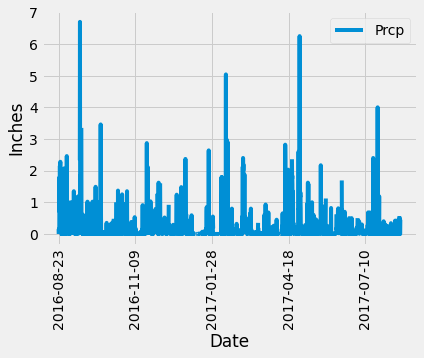

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
a_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# a_year_ago

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(measurement.date, measurement.prcp).\
	filter(measurement.date >= a_year_ago).\
	order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_pd = pd.DataFrame(date_prcp, columns = ['Date', 'Prcp'])
# date_prcp_pd.head(15)

# Sort the dataframe by date
sortby_date = date_prcp_pd.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data
sortby_date.plot("Date", "Prcp")
plt.ylabel("Inches")
plt.xlabel("Date")

unique_dates = sortby_date["Date"].unique()
# x_axis = np.arange(len(sortby_date))
# tick_locations = [value for value in x_axis]

plt.xticks(rotation = 'vertical')

plt.show()

In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sortby_date.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
no_stations = session.query(station.station).count()
no_stations

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station).order_by(measurement.station.dsc()).all()

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with measurement.station has an attribute 'dsc'

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [29]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [30]:
# Close Session
session.close()